# Gender and Mean Suicide Rates in Canada
### Group 11 Final Report
##### Group Members: 
Aaron Cui (94952777)
<br>Aditya Goel (84874379)
<br>Jialu Jin (24403594)
<br>Yirui Wang (27719509)

### Introduction


Suicide is a prevalent cause of death in Canada, accounting for 1.2% of all deaths in the year 2020 (Elflein, 2020). Past research has led us to believe that there may be differences in suicide rates between men and women, therefore we are interested in further studying this phenomenon (Freeman et al., 2017). As a result, our research question for this project is: **Is there a significant difference between the mean suicide rates of males and females in Canada between 1985 and 2013?** We will be using the "Suicide Rates Overview 1985 to 2016" (Rusty, 2018) dataset sourced from Kaggle for our analysis, focusing only on the data relevant to Canada. This dataset has 12 columns and 27820 rows. Different columns are different response variables accross the socio-economic spectrum that might affect the suicide rates globally. Finally, the number of suicides per 100,000 people (essentially the suicide rate) will be our response variable, mean the location parameter, and standard deviation the scale parameter. We decided to use mean as it gives a good sense of the center of the data while standard deviation helps us understand the spread; ultimately helping us evaluate the error in our results. 

### Methods & Results
#### Preliminary Results

In [1]:
# loading all the necessary libraries
library(infer)
library(repr)
library(tidyverse)
library(readxl)
library(digest)
library(dplyr)
library(tidymodels)
library(GGally)
library(RCurl)
library(ggplot2)
library(ggmosaic)

# setting the maximum rows to be displayed to 6
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ modeldata    1.0.1     ✔ workflows    1.0.0
✔ parsnip      1.0.1     ✔ workflowsets 1.0.0
✔ recipes      1.0.1     ✔ yardstick    1.1.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipe

ERROR: Error in library(ggmosaic): there is no package called ‘ggmosaic’


We downloaded the dataset from the web and put it in our repository in the data folder.

In [2]:
# loading the data from the data folder and displaying the head (first 6 rows)
# the data was downloaded from the following link: "https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016"
suicide_data <- read.csv("https://raw.githubusercontent.com/agoel25/stat_201_group_11/main/data/master.csv")
head(suicide_data)

,country,year,sex,age,suicides_no,population,suicides.100k.pop,country.year,HDI.for.year,gdp_for_year....,gdp_per_capita....,generation
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>
1,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NA,"2,156,624,900",796,Generation X
2,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NA,"2,156,624,900",796,Silent
3,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NA,"2,156,624,900",796,Generation X
4,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NA,"2,156,624,900",796,G.I. Generation
5,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NA,"2,156,624,900",796,Boomers
6,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NA,"2,156,624,900",796,G.I. Generation


We cleaned and wrangled the data by filtering only Canada and selecting "sex", "year", "age" and "suicides.100k.pop" columns. 

In [3]:
# filtering for Canada (as our question specifically focuses on Canada) and selecting the appropriate columns
suicide_sample <- suicide_data %>%
                  filter(country %in% c("Canada")) %>%
                  select(sex, year, age, suicides.100k.pop)
head(suicide_sample)

,sex,year,age,suicides.100k.pop
,<chr>,<int>,<chr>,<dbl>
1,male,1985,75+ years,28.45
2,male,1985,55-74 years,27.27
3,male,1985,25-34 years,27.00
4,male,1985,35-54 years,25.40
5,male,1985,15-24 years,25.17
6,female,1985,35-54 years,8.43


We plot a boxplot of number of suicides per 100k population for different sex.

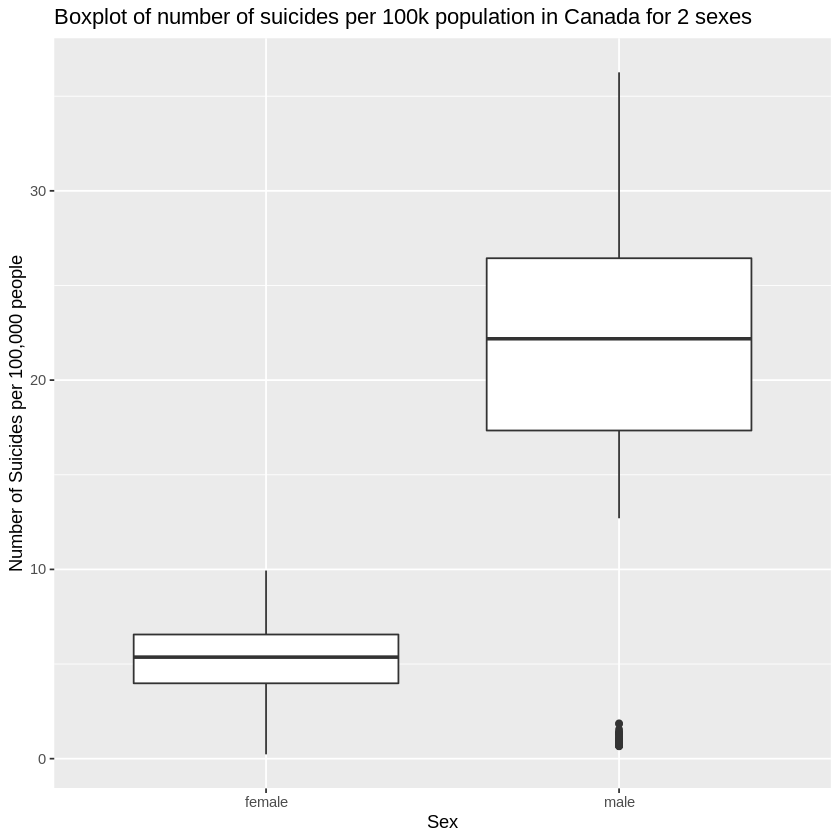

In [4]:
# plotting the boxplot of suicides per 100k population for males and females
boxplot <- suicide_sample %>%
    ggplot(aes(sex, suicides.100k.pop)) + 
    geom_boxplot() +
    ggtitle("Boxplot of number of suicides per 100k population in Canada for 2 sexes") +
    xlab("Sex") +
    ylab("Number of Suicides per 100,000 people")
boxplot

The boxplot indicates that the data for the 2 genders doesn't even overlap once we remove the outliers. Moreover, the suicide rates for males seem to be much higher than those for females.

<br>
We also plot a histogram of Sample distribution of number of suicides per 100k population in Canada for 2 sex groups.

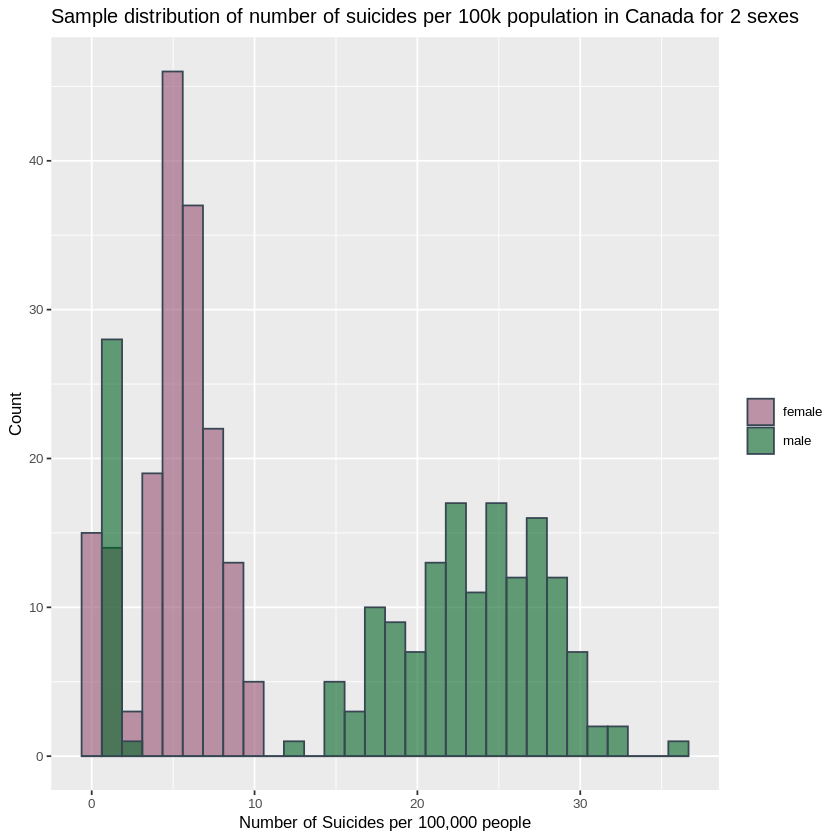

In [5]:
# plotting the sample distribution of suicides per 100k population for males and females
histogram <- suicide_sample %>%
    ggplot(aes(x = suicides.100k.pop, fill = sex)) +
    geom_histogram(bins=30, color="#374652", alpha=0.6, position = 'identity') +
    scale_fill_manual(values=c("#985473", "#036425")) +
    ggtitle("Sample distribution of number of suicides per 100k population in Canada for 2 sexes")+
    xlab("Number of Suicides per 100,000 people") +
    ylab("Count") +
    labs(fill="") +
    theme(text = element_text(size = 10))
histogram

From the histogram, the sample distribution varies a lot for different genders. This means that there is a difference of the mean number of suicides per 100k population for two genders. The data for both the genders doesn't really follow a normal distribution. There is a big spike at ~0 suicides per 100,000 for both males and females. 

<br>
The following is the summary statistics (sample means of suicide rates for females and males). We can clearly see that the mean suicide rates of males is higher than females. 

In [6]:
# calculating the point estimates from our sample for the 2 population groups, that is 
# calculating the mean suicide rates for males and females in Canada
summary <- suicide_sample%>%
        group_by(sex) %>%
        summarize(mean = mean(suicides.100k.pop))
summary

sex,mean
<chr>,<dbl>
female,5.113161
male,19.822011


Even though there is a substantial difference in the mean suicide rates (males having a much higher suicde rates than females) we cannot yet be certain about whether this difference is because of actual distinction between the suicide rates or if its simply a result of sampling variation. Hence, we will be using hypothesis tests to get better more reliable conclusion to our question. We expect to find the extent to which the suicide rates vary between males and females in Canada using their mean and standard deviation. Our prediction is that males do have higher suicide rates then females as can be seen in our priliminary results and previous research studies (Freeman et al., 2017).

#### Hypothesis testing
The essence of this report is to investivage if the mean suicide rates of males are more than the mean suicide rates of females in Canada. Hence, our null hypothesis will be assuming that they are indeed equal. The null and alternate hypothesis are hence: 
- $H_0: \mu_m - \mu_f = 0$ 
- $H_1: \mu_m - \mu_f > 0$

(where $\mu_m$ means the mean suicide rates of males and $\mu_f$ means the mean suicide rates of females. 

We will be conducting hypothesis tests with a significance level of $5\%$ ($\alpha = 0.05$). And it will be a one-sided hypothesis test.

We investigate this using both bootstrap and asymptotic methods, however we first use the bootstrap method. 

**Bootstrap Method**

We use the infer package to form the bootstrap distribution for the difference of means in suicide rates between males and females. We take 1000 bootstrap samples since this ensures a high degree of accuracy while also giving a good enough computation time. Increasing the number of repetitions further would simply lead to a more extensive computation without giving better results or accuracy (any benefits would be marginal). <br>
Additionally, the order of calculating the difference doesn't matter but we subtract the mean of females from the mean of males just for correspondance. 

In [7]:
# setting seed to ensure reproducibility
set.seed(123)
# take 1000 bootstrap samples and calculate the difference in means for each sample
bootstrap_dist <- 
    suicide_sample %>% 
    specify(formula = suicides.100k.pop ~ sex) %>% # suicides per 100k population is set as the response variance and 
                                                   # sex is set as the explanatory variable
    generate(reps = 1000, type = "bootstrap") %>% # generating 1000 bootstrap samples 
    calculate(stat = "diff in means", order = c("male", "female")) # calculating the difference in means
head(bootstrap_dist)

replicate,stat
<int>,<dbl>
1,15.85483
2,13.85279
3,14.11451
4,13.23332
5,14.50301
6,15.92671


Next we calculate the observed test statistic of our sample. This is simply the difference in suicide rates which we observe in the real world in our sample, under no influence of the null hypothesis. 

In [8]:
# calculate the observed test statistic
obs_test_stat <- suicide_sample %>% 
        specify(formula = suicides.100k.pop ~ sex) %>% # suicides per 100k population is set as the response variance 
                                                       # and sex is set as the explanatory variable
        calculate(stat = "diff in means", order = c("male", "female")) %>%
        pull()
cat("The observed difference of means is", obs_test_stat)

The observed difference of means is 14.70885

Now, we simply plot the observed test statistic over the bootstrap distribution of our sample. This gives us an idea of the reliability of the test statistic. 

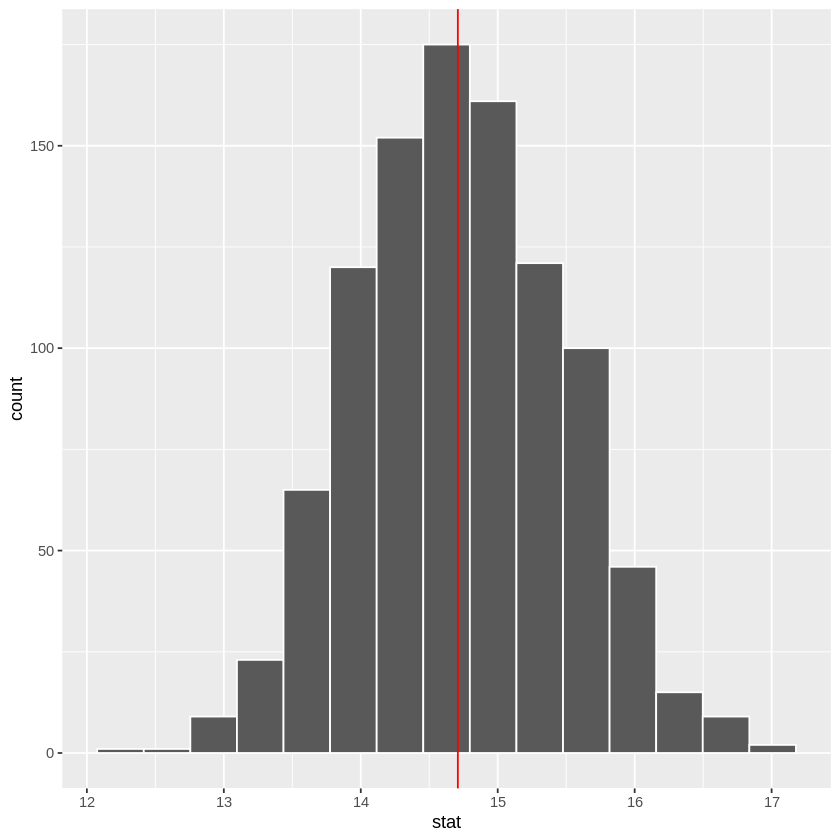

In [9]:
# plot the bootstrap distribution with a red vertical line indicating the observed test statistic
bootstrap_dist_plot <-
    bootstrap_dist %>%
    ggplot() +
    geom_histogram(aes(x=stat), bins = 15, color="white") +
    geom_vline(xintercept = obs_test_stat, color = "red") 
bootstrap_dist_plot

Next, we form the null distribution. This is bootstrap distribution of the sample under the null hypothesis. We adjust all the values to have the center of the distribution to be at 0 since our predicted difference of means is less than or equal to 0. 

In [10]:
# adjust the center of our bootstrap distribution to 0 and call it null_dist
null_dist <- 
     bootstrap_dist %>%
     mutate(stat=stat-(obs_test_stat-0))
head(null_dist)

replicate,stat
<int>,<dbl>
1,1.1459803
2,-0.8560590
3,-0.5943426
4,-1.4755307
5,-0.2058419
6,1.2178606


Below is a plot of the null distribution with a red vertical line plotted at the observed test statistic value. This helps us visualize an estimate of how probable observing this test statistic is if null hypothesis holds (essentially helps us predicted the $p$-value)  

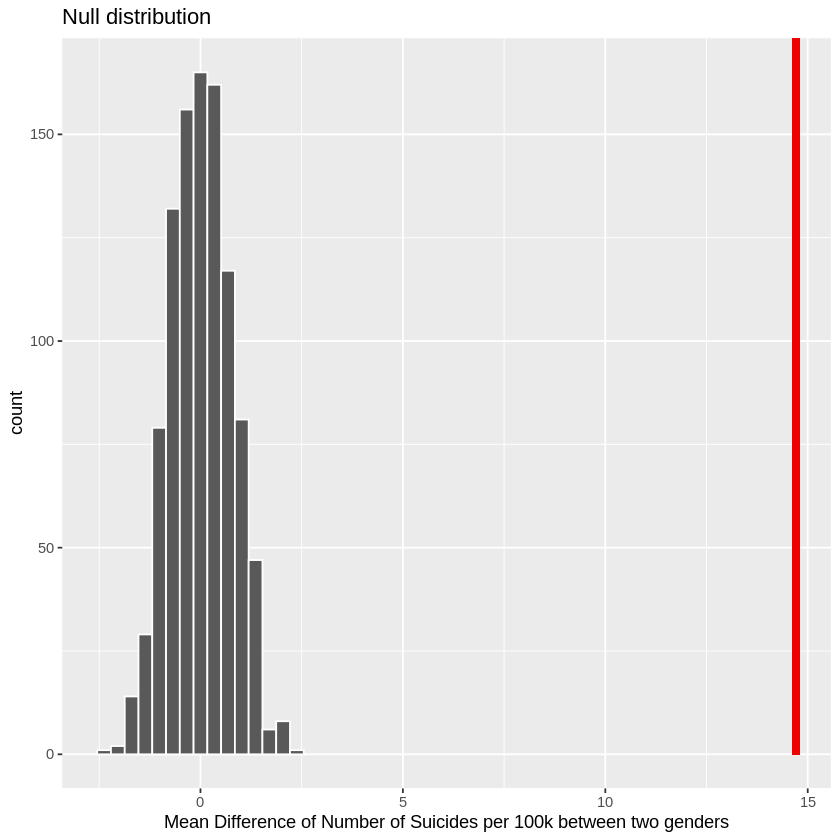

In [11]:
# visualize the null distribution with a vertical line indicating the observed test statistic
visualize_null_dist_p <- 
    visualize(null_dist) + 
    shade_p_value(obs_stat = obs_test_stat, direction = "right") +
    xlab("Mean Difference of Number of Suicides per 100k between two genders") +
    ggtitle("Null distribution")
visualize_null_dist_p

The observed test statistic is quite far away from the null distribution, therefore, it seems highly unlikely that we observe this value when the difference if means is 0. To solidify this, we calculate the $p$-value explicitly. <br>
We use the `get_p_value` function from the `infer` package, and set the `direction` argument to be "right" since our alternate hypothesis is $H_1: \mu_m - \mu_f > 0$

In [12]:
# compute the p-value

pvalue <- 
    null_dist %>% 
    get_p_value(obs_stat = obs_test_stat, direction = "right") |>
    pull()
cat("p-value is", pvalue)

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p-value is 0

The $p$-value seems to be 0 but we should never report it to be 0 as it suggests that it is impossible to make Type I error. Instead, since we are using 1000 bootstrap repitions, we report the next smallest $p$-value possible is that $p$-value $<$ 0.001

This gives us a strong enough reason to report the conclusion of our hypothesis test. <br>

**Given that p-value < 0.001 < 0.05, we reject the null hypothesis at 5% significance level.**

This gives us a strong conclusion which is in line with our predictions from the prilimary results section and previous studies. However, to strengthen this argument, we also form a 95% confidence interval. 

We use the `get_ci` function to simplify this process and use the sample boostrap distribution which we generated in the section above. 

In [13]:
# calculting the 90% confidence interval for our bootstrap distribution
confidence_interval <- bootstrap_dist %>%
    get_ci(level = 0.95, type = "percentile")
confidence_interval

lower_ci,upper_ci
<dbl>,<dbl>
13.31611,16.15745


The lower limit is 13.316 and the upper limit is 16.157. That is to say, after repeated sampling process, we are 95% confident that the true difference of mean suicide rate between two genders in Canada is captured by this interval (13.316, 16.157). That is, of all the confidence intervals that could be calculated, around 95% of them would contain/capture the true difference of mean suicide rates between males and females.  

We have also plotted this confidence interval on the distribution below. 

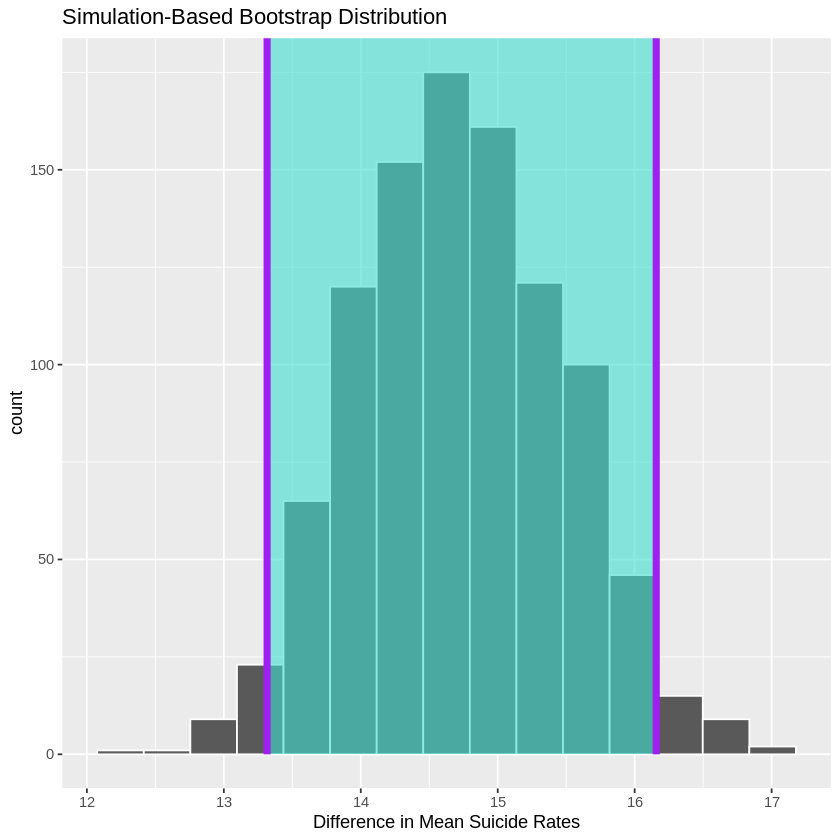

In [14]:
# plotting and shading the confidence interval on the bootstrap distribution. 
confidence_interval_plot <- bootstrap_dist |>
    visualise() +
    shade_ci(endpoints = confidence_interval, color = "purple") + 
    xlab("Difference in Mean Suicide Rates")

confidence_interval_plot

Hence, we can quite confidently say that the null hypothesis can be rejected in this case since even the limits of the confidence interval don't seem to be anywhere close to 0. However, in order to give a proper result report to the stakeholders, we want to be as sure as possible. Therefore, we confirm our simulation based results using theory based methods. 

**Asymptotic Method**

We use the two-sample t test to conduct our asymptotic hypothesis test. 

In order to conduct this test, there are certain assumptions in play: 
    1. Data in each group must be obtained via a random sample from the population and must be independent.
    2. Data in each group is normally distributed. 

The first assumption can be assumed but the second one is partially not satisfied (refer to bootstrap_dist_plot). Moreover, we usually use the t test when we know the standard deviation of the target population, which is not the case. However, we still continue to conduct this test on the grounds of absolute-completion and to see whether our results from the bootstrap method align with this method too. 

In [15]:
# use built-in method t.test in R to conduct a two sample t test 
test_summary <- tidy(
        t.test(x = suicide_sample %>% 
                   filter(sex == "male") %>%
                   pull(suicides.100k.pop),
               y = suicide_sample%>% 
                   filter(sex == "female") %>%
                   pull(suicides.100k.pop),
               alternative = "greater"))
test_summary

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
14.70885,19.82201,5.113161,20.11646,5.37673e-50,197.4708,13.50049,Inf,Welch Two Sample t-test,greater


The p-value provided by the t-test is again less than 0.001, which alligns with the bootstrap method. Hence, we can quite confidently conclude that the null hypothesis can be rejected and that males indeed do exhibit a higher mean suicide rate in Canada over females. 

### Discussion

We found that the mean suicide rates of males is higher than that of females in Canada between 1985 and 2013. From this report, we can confidently say that there is a difference between male and female suicide rates as our p-value is less than 0.001 using both the bootstrapping method and the theory based method. In addition, the sample we used has a size of 348, which is more than required to reliably use bootsrtapping or theory based approaches. However, considering the bootstrap_dist_plot, the distribution of males is not normal, so bootstrapping method is not a good estimating method in this case. Knowing this information, it may be valuable for experts to obtain a deeper perspective around the factors that caused high suicide rates among males and then break them down into different age groups to examine the specific suicidal ideation and behaviors. Afterward, organizations such as non-government agencies, international institutions, and other policymakers could work on prevention efforts and drive changes. Linkages with databanks related to other environments of public health interest (e.g., health records, schools, corrective services, drug and alcohol services) should then be encouraged for public health and research purposes (De Leo, 2015).  If we have a shared database and sufficient analysis of the suicide rates in different countries, it is likely that the loss of life will be minimized.

The results that we obtained did align with our expectations. When initially looking at our boxplots and histograms from our preliminary anlysis, we noticed that there was very little overlap between the suicide rates of males and the suicide rate of females, strongly suggesting that there exists a real difference between suicide rates of the two groups. Our 95% confidence interval of (13.3, 16.2) for the difference in mean suicide rates between males and females along with our p-value of less than 0.001 confirmed our prediction that there was in fact a real difference.

Noticing that there is a difference between suicide rates of the two groups in Canada, it made us think if this was the case in other countries as well. We're curious as which other countries would produce similar results, and if there's any relationship between those countries. We also wonder if there's any countries in the world where female suicide rates are higher than male suicide rates. Furthermore, we think it would be interesting to study the causes of differences in suicide rates between males and females. We could look at countries that have a similar difference in rates, and try to extract commonalities to try to determine what creates these differences in rates. Perhaps we could take these predictor variables and create a classification model that predicts what the difference in suicide rates for a country would be.

### References

1. Rusty. “Suicide Rates Overview 1985 to 2016e.” Kaggle, 1 Dec. 2018, https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016.   

2. Freeman, Aislinné et al. “A Cross-National Study on Gender Differences in Suicide Intent - BMC Psychiatry.” BioMed Central, BioMed Central, 29 June 2017, https://bmcpsychiatry.biomedcentral.com/articles/10.1186/s12888-017-1398-8.  

3. Elflein, John. “Distribution of Deaths Canada by Cause 2020.” Statista, 4 Mar. 2022, https://www.statista.com/statistics/437880/proportion-of-deaths-in-canada-by-disease/#:~:text=However%2C%20the%20leading%20causes%20of,43.9%20percent%20of%20all%20deaths.   

4. Leo, D. D. (2015, February). Can we rely on suicide mortality data? - researchgate.net. ResearchGate. Retrieved November 22, 2022, from https://www.researchgate.net/profile/Diego-De-Leo/publication/272081185_Can_We_Rely_on_Suicide_Mortality_Data/links/5609201208ae13969149c8d6/Can-We-Rely-on-Suicide-Mortality-Data.pdf 